# Tomcat外传
---

原文：https://zhuanlan.zhihu.com/p/54121733 

本来想这周着手写SSM的，后来想想，还是决定稍微绕一下远路吧，也顺便看看JavaWeb的犄角旮旯，故地重游或许有另一番风景。我当初初学JavaWeb时遇到的第一个困难其实是Tomcat！Servlet/JSP难吗？难也不难。只是开头被Tomcat搞懵了，导致学习Servlet时还有点晕，各种概念学不明白，于是更糊涂了。

如果对Tomcat/Servlet等知识没有足够的自我理解，后面SSM学起来很累。相信我，绕一下远路，可能比抄近道收获更多，速度更快。

### 1. Tomcat学艺
---

Tomcat，熟悉的陌生人。`我们所有的项目都运行在它上面`，而我们却往往对它视而不见。

上世纪90年代在大洋彼岸，有一家名唤SUN的公司，创造了一门全新的语言，叫Java。经过短短几年的发展，一跃成为市场上最炙手可热的语言。随后又悟出“Java13绝技”，也就是所谓的JavaEE规范：JDBC，JNDI，EJB，RMI，JSP，Servlets，XML，JMS，Java IDL，JTS，JTA，JavaMail，JAF。

在大洋彼岸还有一家公司，准确来说它是一个组织，专门搞开源的，叫Apache。这家公司搞出了一个叫Tomcat的服务器。Tomcat没完全实现JavaEE规范。13种核心技术，Tomcat只实现了俩：Servlet和JSP。而其他服务器比如JBoss、Weblogic啥的都是完全支持的。所以人们往往更愿意叫Tomcat为轻量级的服务器，也有叫它Servlet/JSP容器的。

听到这，你不禁大叫：不对啊，我记得自己写的程序里有用到JDBC啊，还可以运行哩！

啊，那是因为你导了JDBC包...但是你安装了Tomcat后另外导过Servlet/JSP的包吗？没有嘛！人家实现了Servlet/JSP规范，都整到自己源码里了。

说到这，我也是泪流满面。因为我才发现自己也是个三脚猫。上面“Java13绝技”我特么也就学过JDBC/XML/JSP/Servlet...所以我更愿意称自己是JavaWeb程序员，而不是JavaEE程序员。


### 2. 为什么需要服务器？
---

为什么我用QQ给你发消息，你的微信收不到？

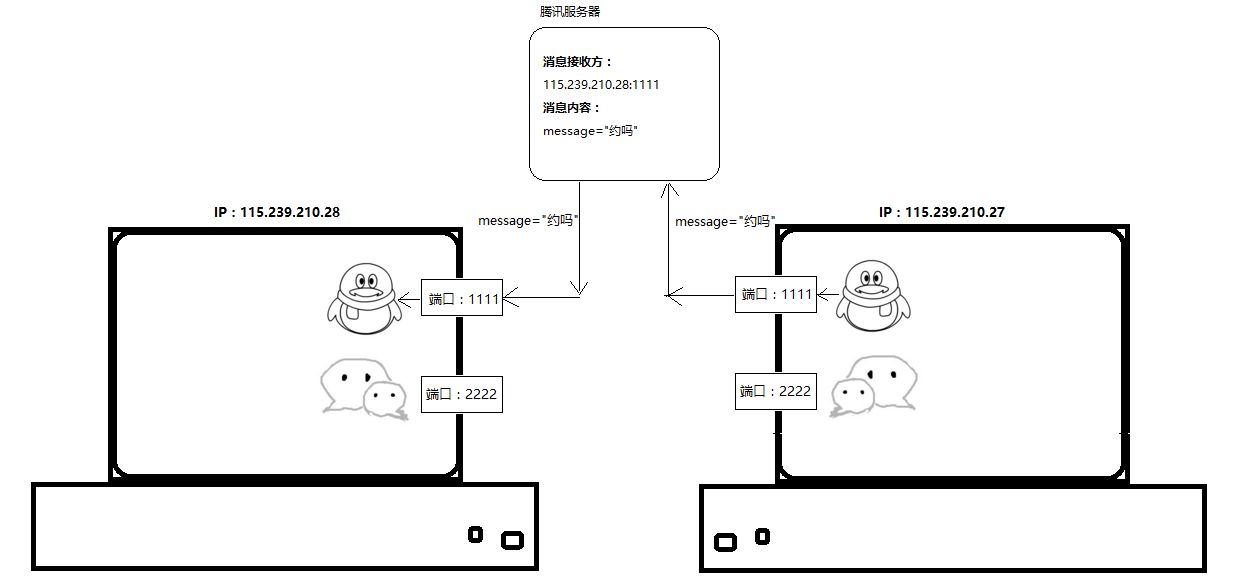

其实QQ这些软件属于C/S架构，已经为我们屏蔽了太多底层，什么IP、端口全部都是自动封装的。相比来说，B/S架构更直观一些。比如用浏览器访问百度：

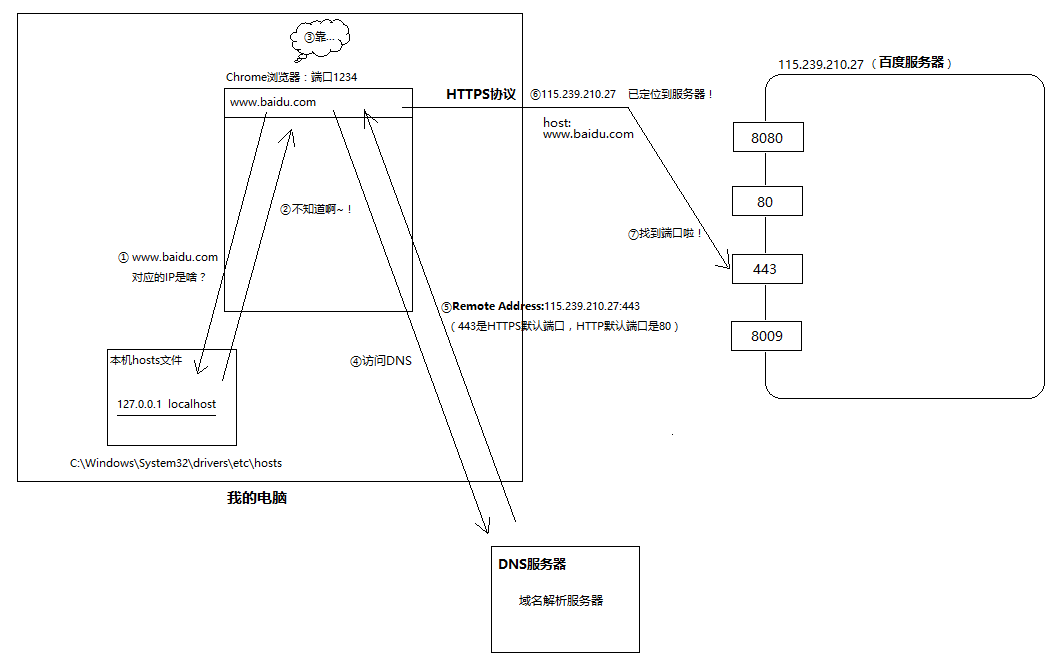

注意下面的细节：

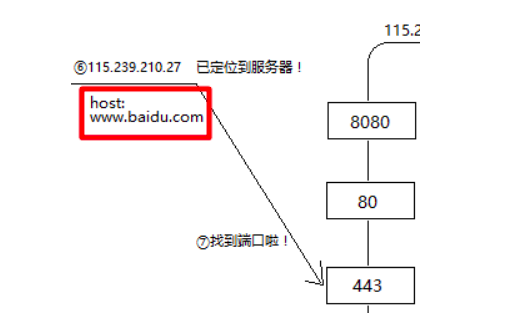

从图中可以看出即便使用DNS解析域名得到对应的IP后, Request请求里还是会带上host. 为什么？

因为一台实体服务器, 理论上可以有多个域名, 就是一台电脑上运行mysql服务器的同时也可运行tomcat.


比如上面百度服务器，虽然看起来115.239.210.27这个IP完全等同于http://www.baidu.com， 但也有可能这个IP对应的服务器上配置了两个`虚拟主机`：www.baidu.com 和 tieba.baidu.com。所以即使找到了IP对应的服务器实体，Request请求还是要带上host主机名，以确定是哪个`虚拟主机`。

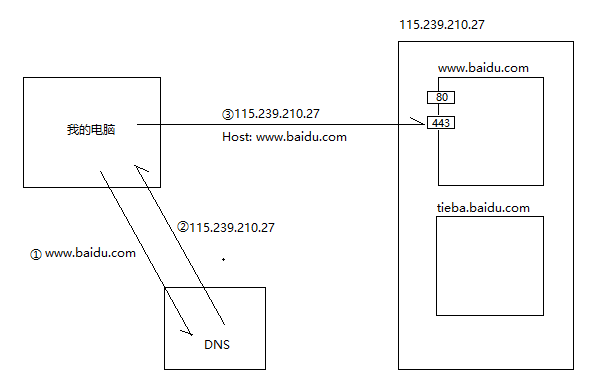

现在我有一台笔记本电脑，它的本机IP是192.168.112.1，我在上面装了Tomcat。如果Tomcat不改动配置，则默认只有一个`虚拟主机localhost`（默认主机）。接着我开发了一个JavaWeb程序demo1部署到Tomcat，然后我同事在浏览器输入下方地址访问我的电脑。虽然没有带host，但是localhost是默认的，于是访问它。

```bash
192.168.112.1:8080/demo1/index.html
```

![5.png](attachment:5.png)

最后必须解释的是，上面的百度服务器只是举个例子，实际上百度搜索和百度贴吧的IP是不同的，也就是说它们不在同一台服务器上。通常来说，一个IP对应一台服务器，服务器上只有一个主机。拿到IP基本就可以确定要访问哪个网站。

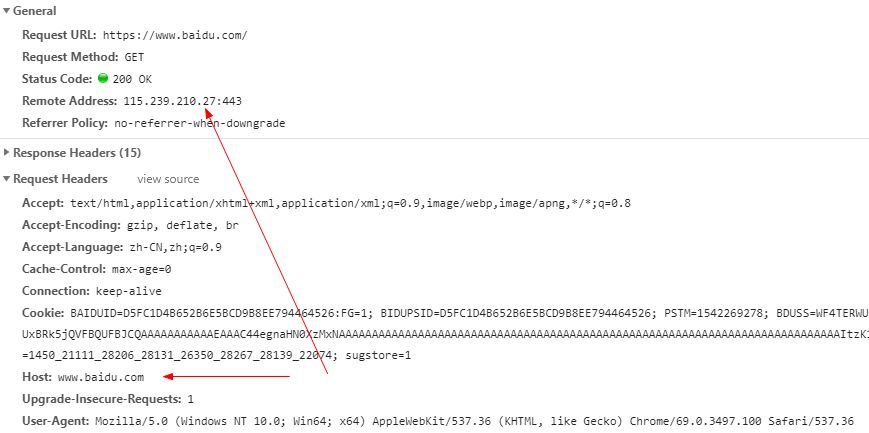

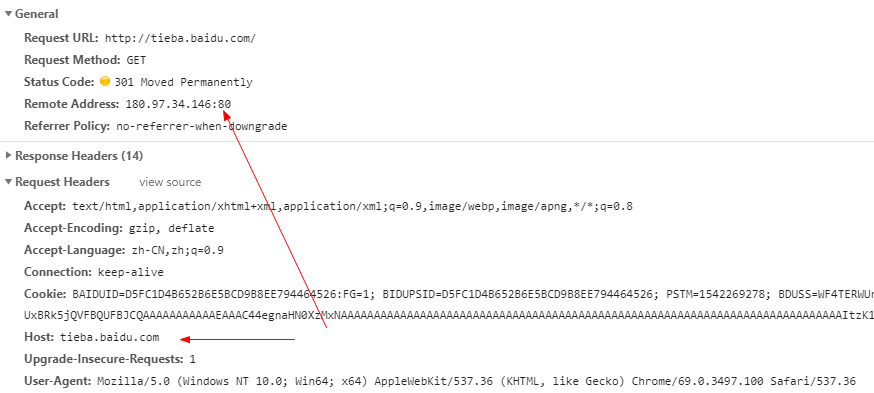

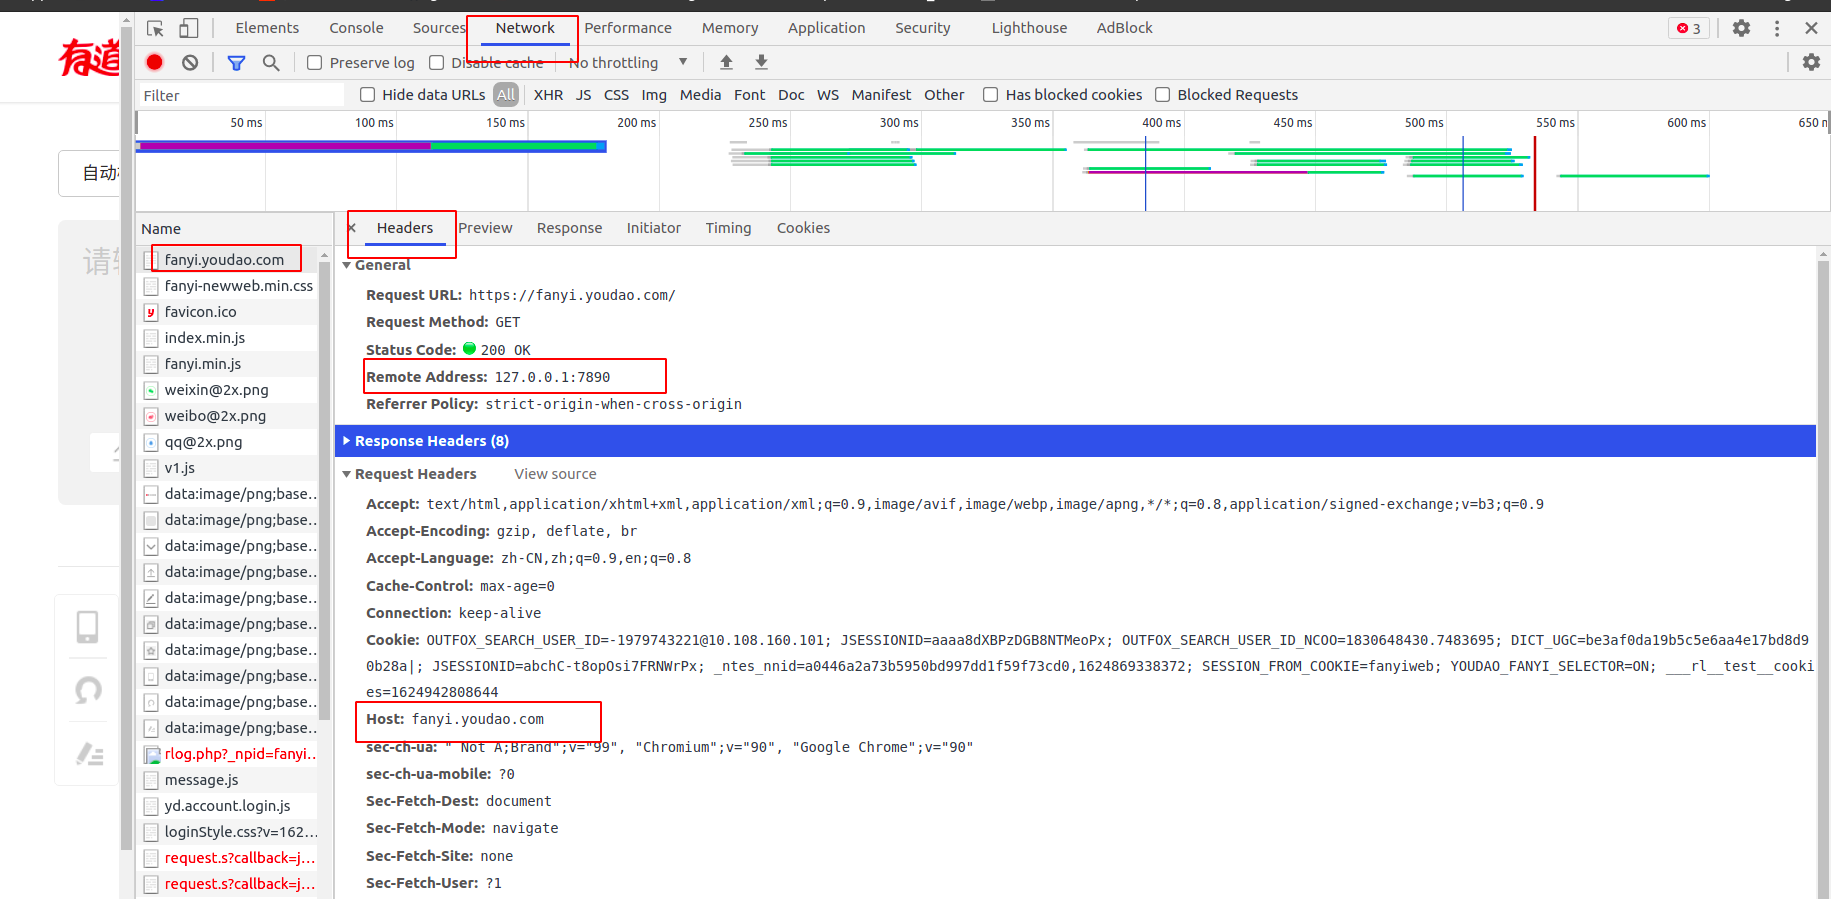

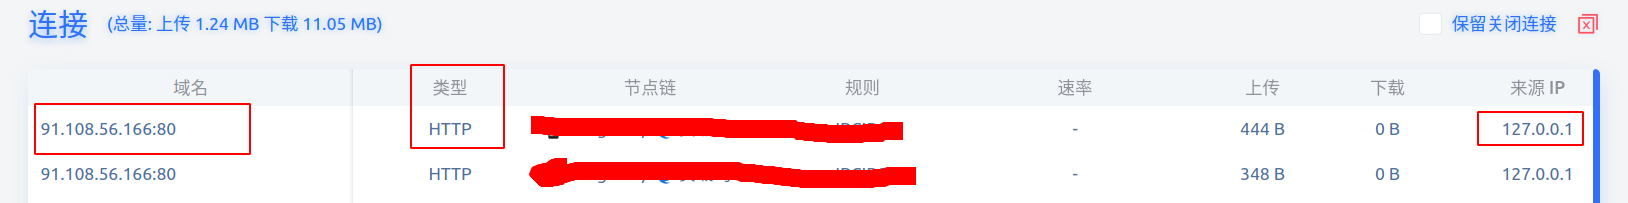

> 我自己电脑上用了http代理，设置的是127.0.0.1:7890所以看到的是remote address:127.0.0.1:7890

## 3. Web server, Web container
---

Web server的作用是接收客户端的requests，给客户端作出响应。但是很明显，服务器不止静态资源呀，所以客户端发起请求后，如果是动态资源，Web服务器不可能直接把它响应回去（比如JSP），因为浏览器只认识静态资源。所以对于JavaWeb程序而言，还需要JSP/Servlet container，JSP/Servlet container的基本功能是把动态资源(jsp)转换成静态资源。我们JavaWeb工程师需要同时使用Web server和JSP/Servlet container，Tomcat集这两者于一身。

> Apache Tomcat, one of the most popular web server and Servlet container for Java code.

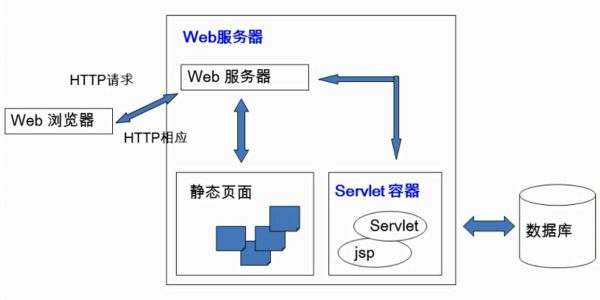
> Web server接收、响应客户端request，Web container装载Servlet/JSP，让它们去处理动态资源

所以刚才我们画的百度服务器，其实细节还可以更丰满些：
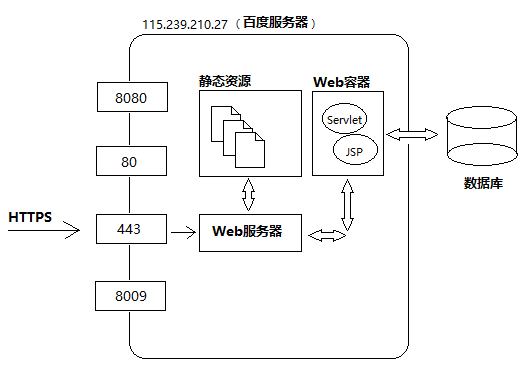

>The following figure depicts a typical servlet life-cycle scenario.
> + First the HTTP requests coming to the web server are delegated(delegate 委派……为代表，任命) to the servlet container.     
> ...  
> + Then the servlet container handles multiple requests by spawning multiple threads, each thread executing the service() method of a single instance of the servlet.  


## 4. 我们开发的Web应用都是半成品！
---

上百上千的Web应用有什么共性吗？
有一点是一样的，这些网站都需要“接收用户请求”+“响应用户请求”。

嗯？桥多麻袋！！这两个概念，好像哪里见过！不错，就是上面的Web服务器。仔细回想一下，我们开发JavaWeb时，你操心过如何接收HTTP请求和响应HTTP请求吗？显然没有嘛！因为你一直忙着debug。

所以，我们用Java开发的Web应用只是一个半成品，类似于一个插件，而服务器则像一个收发器：

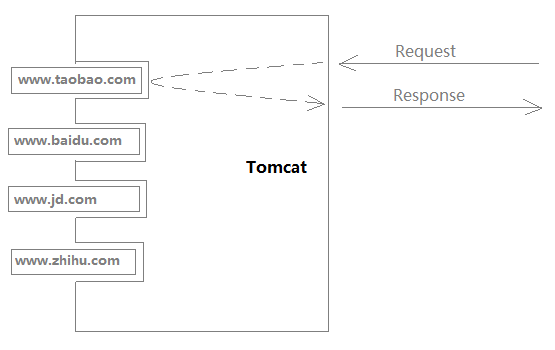

> Apache Tomcat, one of the most popular web server and Servlet container for Java code.

## 5. Tomcat架构
---

Tomcat的目录结构就不再多说，每个机构的培训视频都会强调。

先看一下我的Tomcat目录（免安装版），我把它放在了F盘的develop文件夹下：

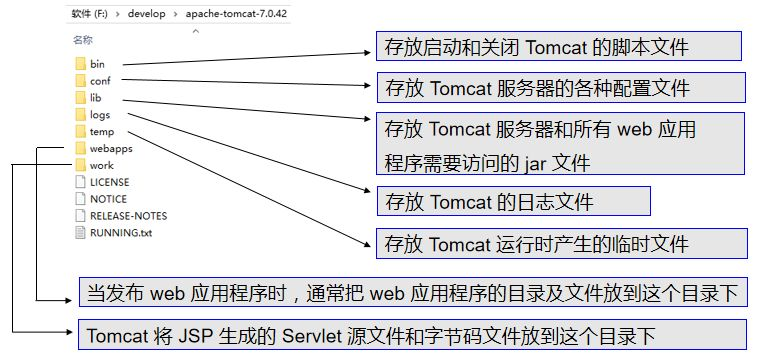

重点介绍一下Tomcat的架构图：

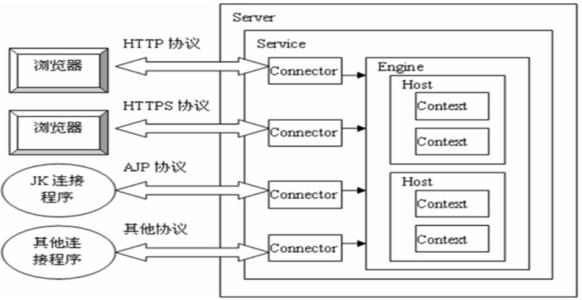

其实这张图，应该结合Tomcat的一个配置文件(Server.xml)来看：

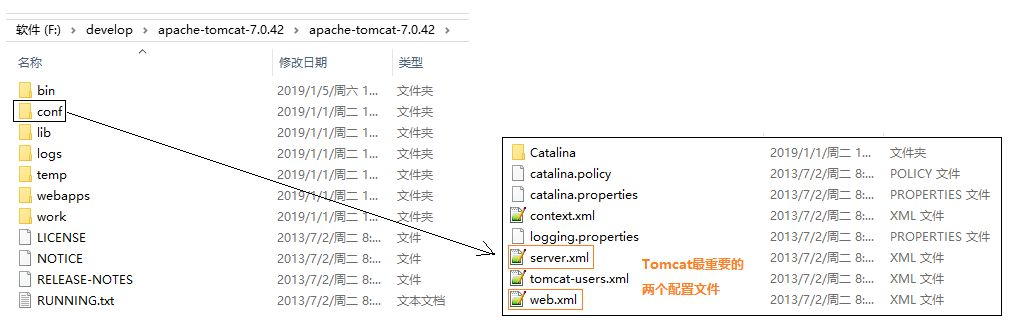

### 5.1. server.xml
这两个xml都会介绍 先介绍server.xml

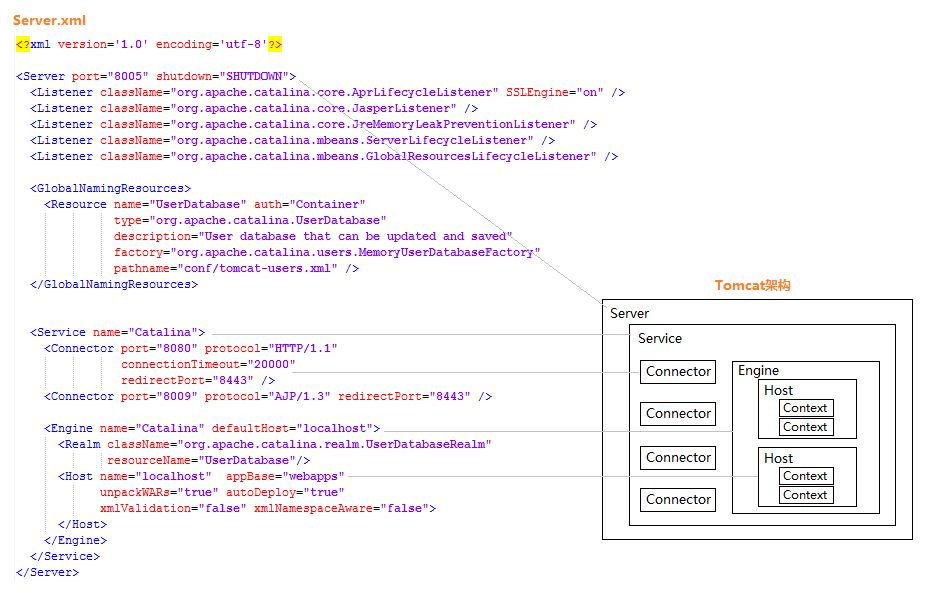

简略解释一下server.xml里的配置：

+ Server.xml 文件中的配置结构和Tomcat的架构是一一对应的。根目录是 `<Server>`，代表服务器，`<Server>` 下面有且仅有1个`<Service>`，代表服务。
    
    
+ `<Service>`下有两个`<Connector>`，代表连接（需要的话可以再加）。
    
    
+ 其实这个Connector就是我们在上面讨论百度服务器时画过的端口。大家可以看到Tomcat默认配置了两个端口，一个是HTTP/1.1协议的，一个是AJP/1.3协议（我也不知道是啥）。前者专门处理HTTP请求。
    

+ 当我们在浏览器输入"http://localhost:8080/demo/index.html "时，浏览器是以HTTP协议发送的，当这个请求到了服务器后，会被识别为HTTP类型，于是服务器就找来专门处理HTTP的Connector，它的默认端口正是上门Server.xml配置的8080。
    
    
+ 与Connector平级的还有个`<Engine>`（Tomcat引擎），也就是说`<Service>`有两个孩子，小儿子是`<Connector>`，大儿子是`<Engine>`。Connector的作用说穿了就是监听端口，如果用户访问地址是“ localhost:8080/xx/xx ”，那就由监听8080端口的Connector负责，如果是" https://www.baidu.com "，那么就是443端口处理。其实Connector也不处理实际业务，它只是个孩子。但它会负责把客人（请求）带到哥哥Engine那，然后Engine会处理。
    

+ `<Engine>`下面有个Host，代表主机。


讲个故事：
> 从前有个国家，叫The United States of Tomcat。
国王Service是个爱猫的人，家庭和谐美满。
> 
> 他立了一个太子，叫做Engine。
> 
> 另外还有还几个很小的儿子，不过都是亲王（Connector），未来可能还要再生几个Connector。
> 
> 由于Tomcat国实在太小了，全城上下就几个人，所以亲王Connector们被派去守城门。
> 
> 为了让太子得到锻炼，早日继承衣钵，国王Service告诉亲王儿子们：他国使者若来拜访，你们就带他去你们哥哥Engine那去，他会处理一切。
> 
> Engine贵为太子，有好几处府邸，比如HOST1，HOST2，未来可能再建几座府邸（新建虚拟主机），但是Engine说了，我一般都在localhost待着，来这找我便可。
> 
> 每一座府邸里，都有好几个厢房（Context：我们开发的不同的Web应用）。Engine会根据来访使者的通关文牒（localhost:8080/myWeb/index.html）安排他们去哪个房间（myWeb），拿什么礼品（index.html）。

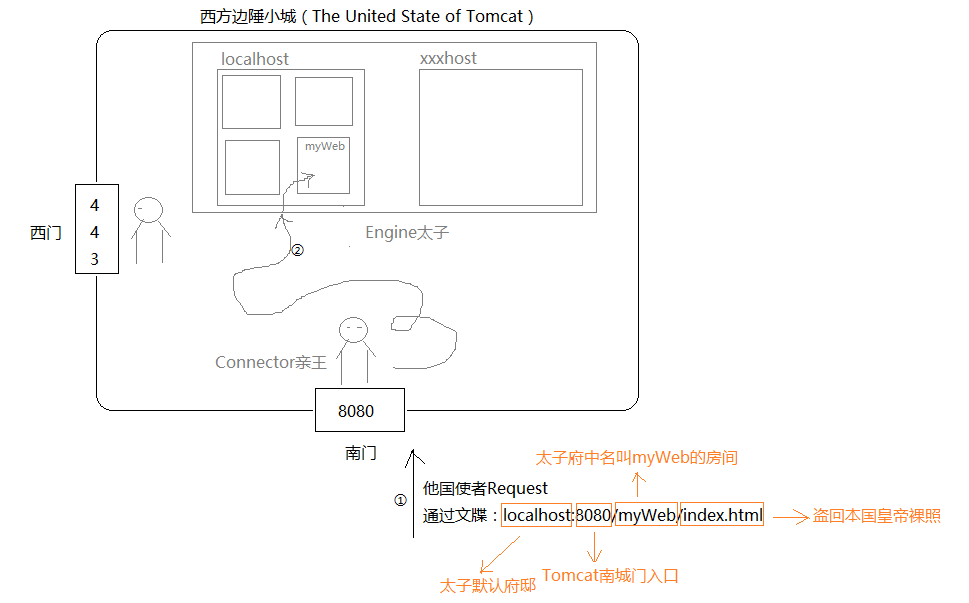

最后结合文件目录再看一次Tomcat架构：

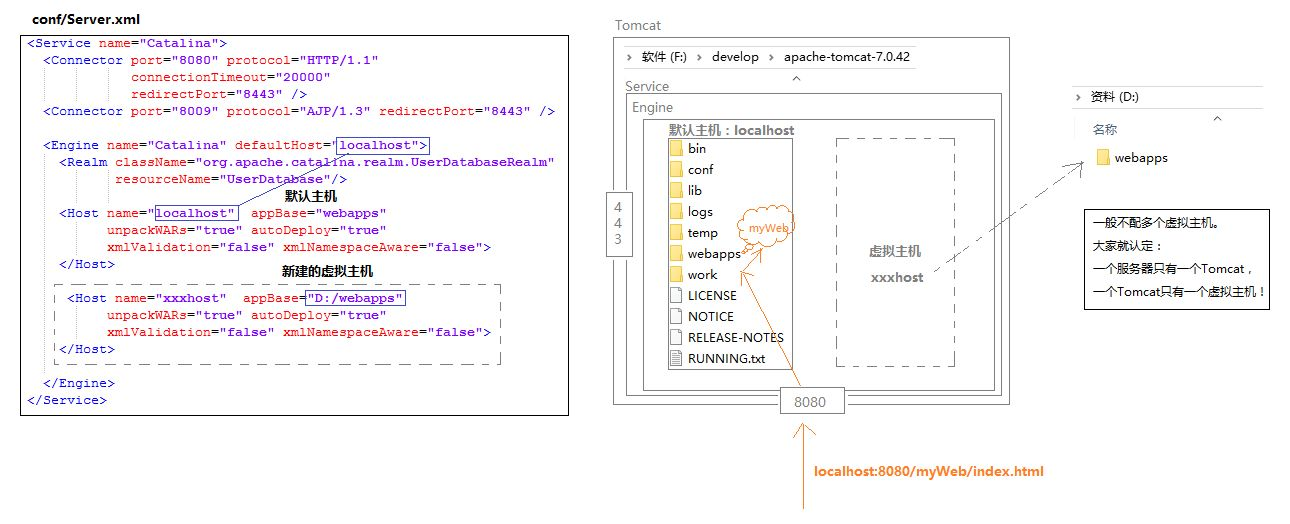


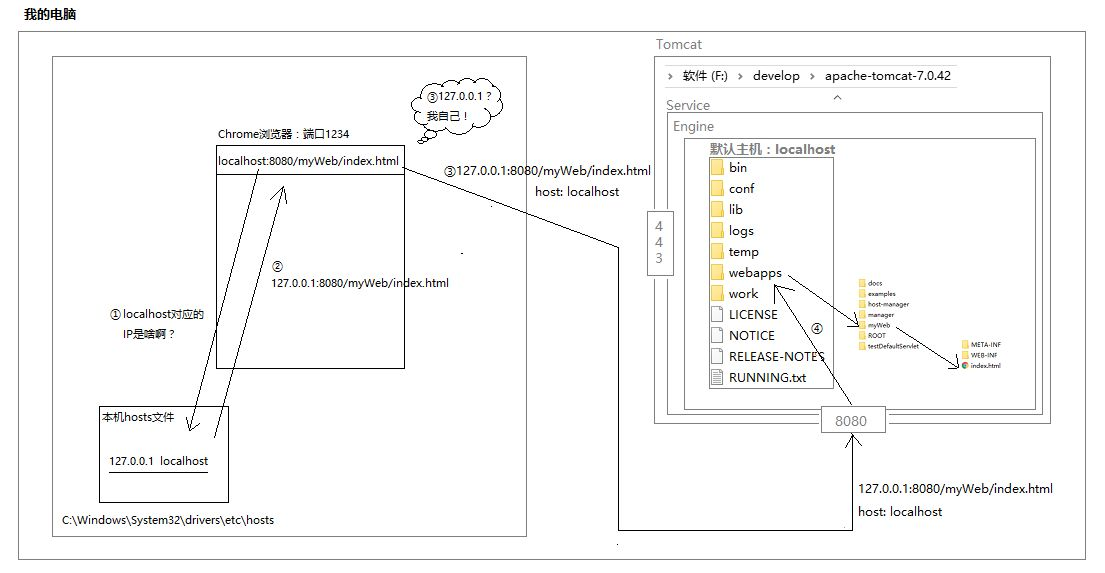

> 每一座府邸里localhost，都有好几个厢房（Context：我们开发的不同的Web应用）。Engine(太子)会根据来访使者的通关文牒（localhost:8080/myWeb/index.html）安排他们去哪个厢房（我们开发的不同的web应用），拿什么礼品（index.html）。


>The following figure depicts a typical servlet life-cycle scenario.
> + First the HTTP requests coming to the web server are delegated(delegate 委派……为代表，任命) to the servlet container.     
> ...  
> + Then the servlet container handles multiple requests by spawning multiple threads, each thread executing the service() method of a single instance of the servlet.  

### 5.2. web.xml
有两个Servlet很重要，但是在“JSP.ipynb”中没有提到。

+ **DefaultServlet：该出手时就出手**

...

上面案例中，我新建一个动态web工程，只是写了一个HTML，没有编写Servlet，甚至一句Java代码都没写。但是启动Tomcat后我却可以通过浏览器访问到刚才编写的haha.html  这是为何？

我们知道，对于像Tomcat这样的Servlet容器来说，任何一个请求的背后肯定有个Servlet在默默处理：

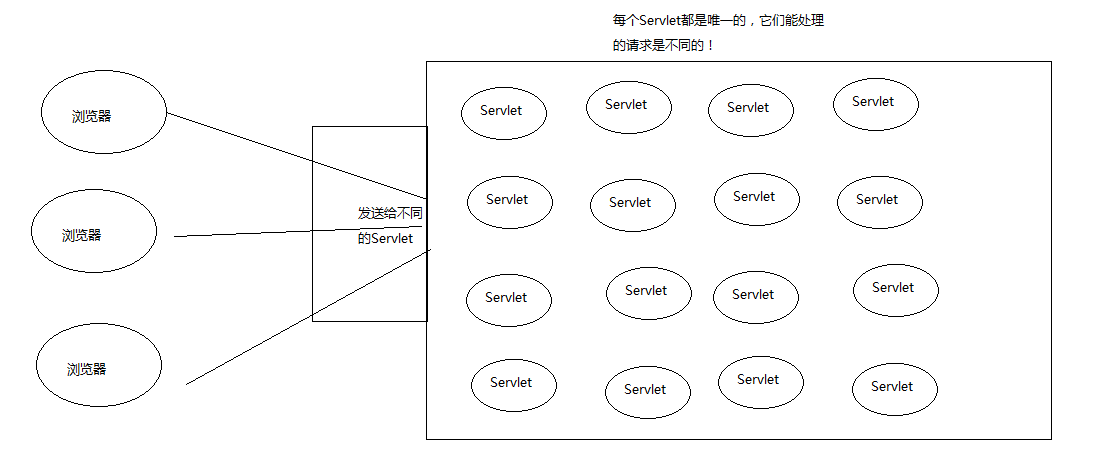


所以这次也不例外，肯定也有对应的Servlet处理了本次请求。既然不是我们写的，那只能是Tomcat提供的。查看Tomcat下的conf目录，除了我们熟悉的Server.xml，还有个web.xml。

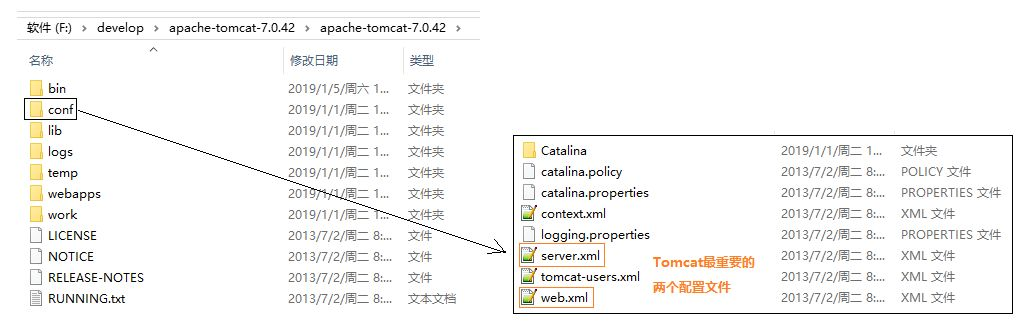


不错，我们每个动态web工程都有个web.xml，而conf里的这个，是它们的“老爹”。它里面的配置，如果动态web工程没有覆盖，就会被“继承”下来。我们会发现，conf/web.xml里配置了一个DefaultServlet：

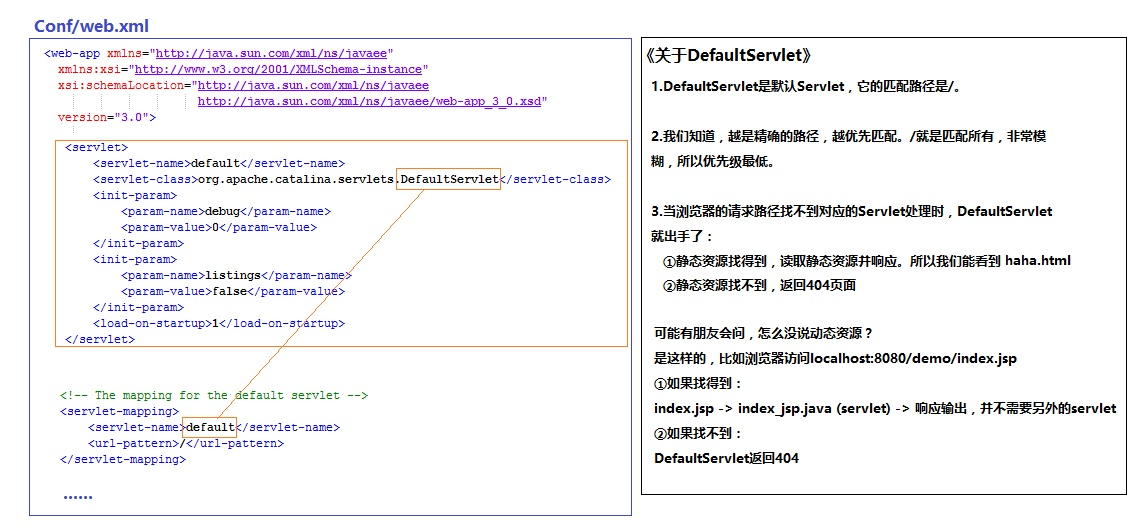

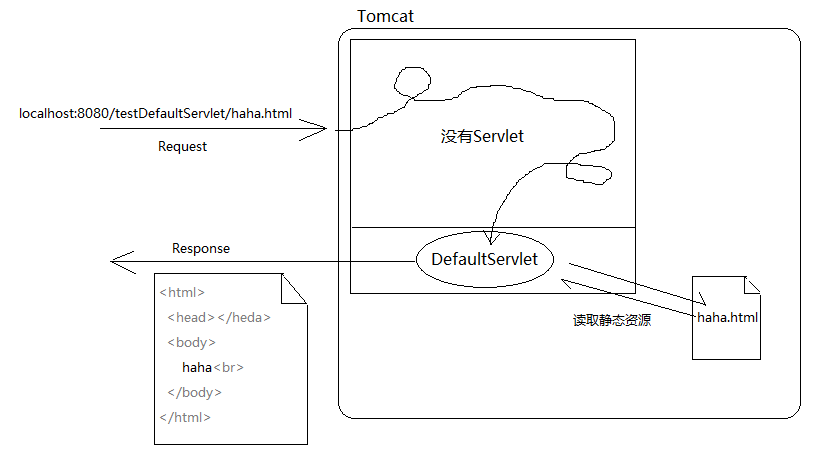

> DefaultServlet的作用：最低级匹配，当没有对应的Servlet处理当前请求时，才轮到它处理。要么找到并响应请求的资源，要么给出404页面。

+ **JspServlet：JSP的卸妆师傅**

我们都知道JSP是“化了浓妆”的Servlet，但是好不容易伪装成了一个JSP，是谁帮它卸妆的呢？另外，大家仔细想想，一般来说JavaWeb阶段我们访问资源有三种“形式”：

```java
localhost:8080/demo/AServlet：很明显，我们手动写了一个AServlet处理它
localhost:8080/demo/haha.html：虽然我们没写，但是Tomcat自己准备了DefaultServlet
localhost:8080/demo/index.jsp：我擦，谁来处理？
```

对呀，细思恐极，这*.jsp的资源，谁来处理？其实就是JspServlet。它的作用简而言之就是：

+ 首先，根据请求路径找到JSP

+ 然后，将它“翻译成”Servlet

When a browser asks for a JSP, the JSP engine first checks to see whether it needs to compile the page. If the page has never been compiled, or if the JSP has been modified since it was last compiled, the JSP engine compiles the page.

The compilation process involves three steps −

+ Parsing the JSP.
+ Turning the JSP into a servlet.
+ Compiling the servlet.

刚才带大家看conf/web.xml时，我把它隐藏了，因为同时讲解DefaultServlet和JspServlet会比较乱。强烈建议大家现在暂停一下，打开本机的Tomcat找到conf/web.xml看一下。下面是JspServlet的配置：

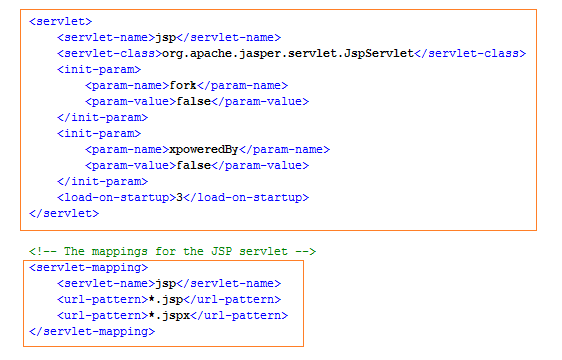


所以最后总结一下Tomcat处理请求的几种方式：

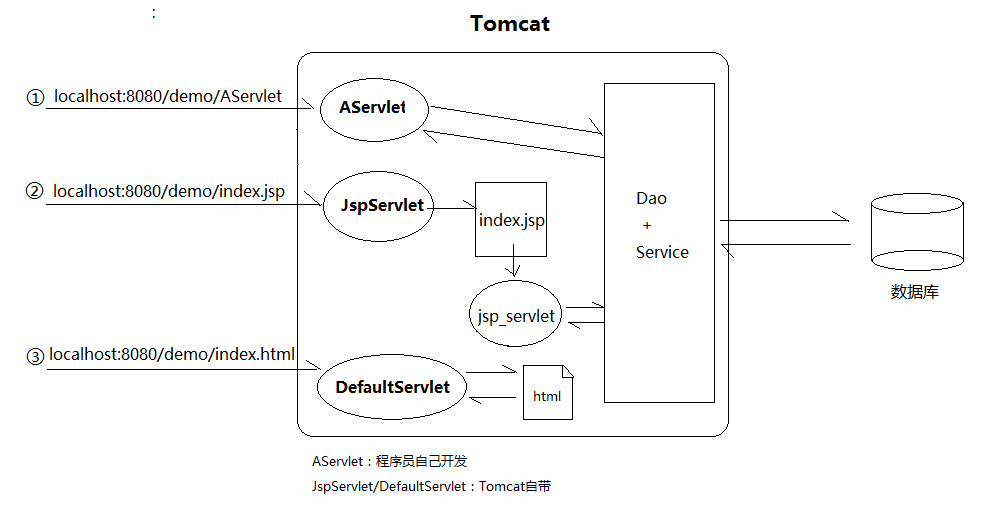

## 6. 动手实现"Tomcat"

最后，还有个很无聊的问题留给大家思考：JavaSE阶段，我们无论做什么，都是上来先敲main()。学了JavaWeb后，我想问问，你有多久没敲main()了？她去哪了呢？

There is still a main method. It's just not written by the developer of the application, but by the developer of the container.

Web applications do not have to contain main methods. This is because you don't need to explicitly start any Java process from within your web application. Somewhere in its depths, Tomcat calls a main method of the code it has been built from. This happens at server startup time.

Then, it will bind your code to incoming HTTP calls, but it will not start new processes for that. It will rather start new threads.